## 2.1 Binary Distribution

首先我们假设有一个非均匀的硬币，也就是说掷该硬币得到正反两面的概率并不相等，采用二元随机变量 $x\in \{0,1\}$来表示掷硬币得到的结果。那么在给定参数为 $\mu$ 的条件下，有 $p \left(x=1 | \mu\right)=\mu, \ p \left(x = 0 |\mu\right)=1-\mu$, $x$ 概率分布用统一的形势表达为贝努力分布（Bernoulli distribution）： 
$$
    Ber\left( x | \mu \right) = \mu^x \left(1-\mu\right)^{1-x} = \left\{ \begin{matrix}&\mu, x=1;\\ &1-\mu, x=0. \end{matrix} \right.
$$
该分布的均值和方差表示为
$$
\begin{split}
 \mathbb{E}\left[x\right] &= \mu\\
 var \left[x\right] & = \mu\left(1-\mu\right)
\end{split} 
$$

那么对于随机变量 $x$ 的观测样本集合 $\mathcal{D} =\left\{ x_1, \ldots, x_n \right\}$， 假设样本取值相互独立，那么可以给出似然函数：

$$
    p\left(\mathcal{D} | \mu \right) = \prod_{n=1}^n p \left(x_n | \mu\right) =  \prod_{n=1}^n \mu^{x_n}\left(1-\mu\right)^{1-x_n}
$$

根据统计学家的观点，我们可以用最大化似然的方式来估计其中的参数 $\mu$ ,最大化似然等价于最大化对数似然，也就是：

$$
\underset{\mu}{max}: \ln p\left(\mathcal{D}| \mu\right)=\sum_{n = 1}^{N}\ln p\left(x_n | \mu\right)= \sum_{n=1}^{N}\left\{x_n \ln \mu + \left(1-x_n\right)\ln\left(1-\mu\right)\right\}
$$

令上式的导数为0，我们可以得到参数 $\mu$ 的最大似然估计值 ： $ \mu_{ML} = \frac{1}{N} \sum_{n=1}^N x_n$; (通常称为样本的均值)，如果我们仅统计正面朝上的次数 $m$ , 那么得到最大似然的估计值可以计算为：  $ \mu_{ML} = \frac{m}{N}$


* 现在我们假设另外一种可能的情况，也就是我们在抛硬币的时候，发现抛三次，三次都是正面朝上，也就是说 $N = m = 3$， 这种情况下，我们通过最大似然得到的参数估计值为 $\mu_{ML} =1$ ，这是指，我们每次抛硬币都只可能出现正面朝上，显然，这与我们常识是相悖的， 实际上，这是一种极端情况，是最大似然出现 **过拟合** 的极端情况，现在需要介绍如何通过先验概率分布来得到一个更加 合理的结论。

* 我们可以计算出随机变量 $m $ 的分布情况，实际上也就是二项式分布：
$$
Bin\left(m| N, \mu\right) = C_N^m\mu^m\left(1-\mu\right)^{N-m}
$$
    其中 $C_N^m = \frac{N!}{\left(N-m\right)! m!}$, 由于 $m = x_1+ \ldots + x_n$ , 而 $x_1$ 和 $x_n$ 之间相互独立，那么$m$的均值和方差可以计算为他们的均值之和，方差之和
    
$$
\begin{split} 
 \mathbb{E}\left[m\right] &= \sum_{m = 0}^{N} m Bin\left( m|N, \mu \right)  = N\mu,\\
 var\left[m\right] &= \sum_{m=0}^N \left( m-\mathbb{E}\left[x\right] \right)^2 Bin\left(m |N,\mu\right) = N\mu\left(1-\mu\right)
 \end{split}
$$

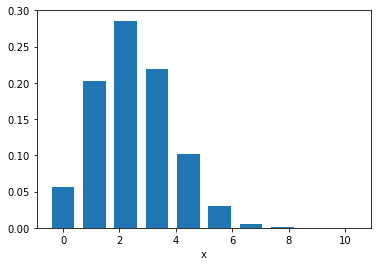

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.special import comb, perm
%matplotlib inline
fig, ax = plt.subplots();
N = 10; mu = 0.25; 
m_num = np.linspace(0,10,10);
Bin_m = comb(N,m_num )*mu**m_num * (1-mu)**(N-m_num);
plt.bar(m_num, Bin_m);
ax.set_xlabel('x')
plt.show();

### 2.1.1 The beta distribution

先给出分布的函数; $ Beta\left(\mu | a,b\right) = \frac{\Gamma\left(a+b\right)}{ \Gamma\left(a\right)\Gamma\left(b\right) } \mu^{a-1}\left(1-\mu\right)^{b-1} $;

该分布中的系数 $ \frac{\Gamma\left(a+b\right)}{ \Gamma\left(a\right)\Gamma\left(b\right) }$ 是为了归一化，而后面半部分于m的分布形式一致，在计算后验概率的时候能够保持形式上的不变，这种性质称为 **共轭**, $a,b$ 被称为超参数，控制着分布的形状
$$
\begin{split}
\mathbb{E} \left[x\right] &= \frac{a}{a+b} \\
var\left[x\right] &=\frac{ab}{\left(a+b\right)^2\left(a+b+1\right)}
\end{split}
$$


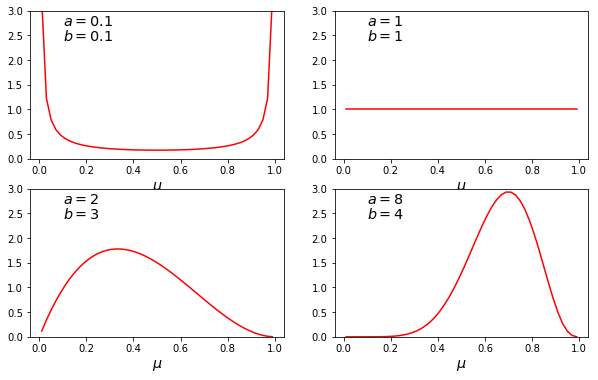

In [4]:
from scipy.special import gamma
def Beta_distribution(mu_num,a,b):
    beta_dis = gamma(a+b)/gamma(a)/gamma(b)* mu_num**(a-1)*(1-mu_num)**(b-1)
    return beta_dis;
def PlotThe_distribution(mu_num, beta_dis, a,b ,ax):
    #plt.subplot(i,j,n);
    #plt.figure(figsize=(6,4));
    ax.plot(mu_num, beta_dis,'r');
    ax.set_ylim(0,3);
    ax.set_xlabel('$\mu$',fontsize = 'x-large')
    ax.text(0.1,2.7,'$a={}$'.format(a),fontsize= 'x-large');
    ax.text(0.1,2.4,'$b={}$'.format(b),fontsize= 'x-large');

fig, axes = plt.subplots(2,2,figsize =[10,6]);
axes = axes.flatten();

mu_num = np.linspace(0.01,1-0.01,50);
a=0.1; b=0.1; beta_dis = Beta_distribution(mu_num,a,b);
PlotThe_distribution(mu_num, beta_dis, a,b,axes[0]);

a=1; b=1; beta_dis = Beta_distribution(mu_num,a,b);
PlotThe_distribution(mu_num, beta_dis, a,b ,axes[1]);

a=2; b=3; beta_dis = Beta_distribution(mu_num,a,b);
PlotThe_distribution(mu_num, beta_dis, a,b ,axes[2]);

a=8; b=4; beta_dis = Beta_distribution(mu_num,a,b);
PlotThe_distribution(mu_num, beta_dis, a,b ,axes[3]);

plt.show();

通过 $Beta\left(\mu | a,b\right)* Bin\left(m| N, \mu\right) $ 然后归一化，我们可以得到 $\mu $ 的后验分布 
$$
    p\left(\mu | m,l,a,b\right) = \frac{\Gamma\left(m+a+l+b\right)}{\Gamma\left(m+a\right)\Gamma\left(l+b\right)}\mu^{m+a-1}\left(1-\mu\right)^{l+b-1}
$$
其中 $l = N-m$。 观察到上式中，相比于原始的似然函数，$m$ 和 $l$ 的数值都有所增加，增加量分别为 $a,b$。
如果我们将样本数据视为一个观察数列，那么前一个序列的后验概率计算结果可以视为下一个结果的先验，给定数据集$\mathcal{D}$, 那么下一个观测值的期望值为：
$$
p\left(x=1\mathcal{D}\right) = \int_0^1 p\left(x=1| \mu\right)p\left(\mu|\mathcal{D}\right)d\mu = \int_0^1\mu\left(\mu|\mathcal{D}\right)d\mu  =\mathbb{E}\left[\mu | \mathcal{D}\right]
$$
即得到： $p\left(x=1\mathcal{D}\right) = \frac{m+a}{m+a+l+b}$
当上式中的$m,l \rightarrow \infty$， 那么上式的结果和最大化似然的结果一致，而在其他数值下，计算结果始终在最大后验和最大似然的结果之间，显然的，当数据集合无穷大时候，最大后验的记过趋近于最大似然的结果； 而当最大后验结果中的$a,b \rightarrow \infty$时，结果的方差越来越趋向于0。


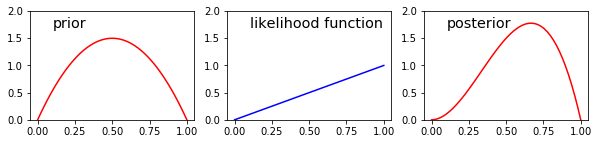

In [8]:
mu_data = np.linspace(0,1, 50);
prior = Beta_distribution(mu_data,2,2);
likelihood= mu_data;
posterior = Beta_distribution(mu_data,3,2);

fig,axes = plt.subplots(1,3,figsize=(10,2))
axes = axes.flatten();

axes[0].plot(mu_data, prior,'r');
axes[0].text(0.1, 1.7,"prior" ,fontsize = 'x-large');
axes[0].set_ylim(0,2); ax.set_xlabel('$\mu$', fontsize = 'x-large');
            
axes[1].plot(mu_data, likelihood,'b');
axes[1].text(0.1, 1.7,'likelihood function' ,fontsize = 'x-large');
axes[1].set_ylim(0,2); ax.set_xlabel('$\mu$', fontsize = 'x-large');            


axes[2].plot(mu_data, posterior,'r');
axes[2].text(0.1, 1.7,'posterior' ,fontsize = 'x-large');
axes[2].set_ylim(0,2); ax.set_xlabel('$\mu$', fontsize = 'x-large');

plt.show();